In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#I Data analysis

In [3]:
#1 Loading Dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
#2 Identifying Duplicates
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()}")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()}")

Duplicates in Train Dataset is:0
Duplicates in Test Dataset is:0


In [5]:
#3 Checking data types 
print("Data Types of features of Training Data is:")
print(train_df.dtypes)
print("\nData types of features of Testing Data is:")
print(test_df.dtypes)

Data Types of features of Training Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Data types of features of Testing Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [6]:
#4 Looking for missing values
df1 = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1

,Number of Missing values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [7]:
df2 = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df2["% of Missing Values"] = round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2).values
df2

,Number of Missing values,% of Missing Values
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


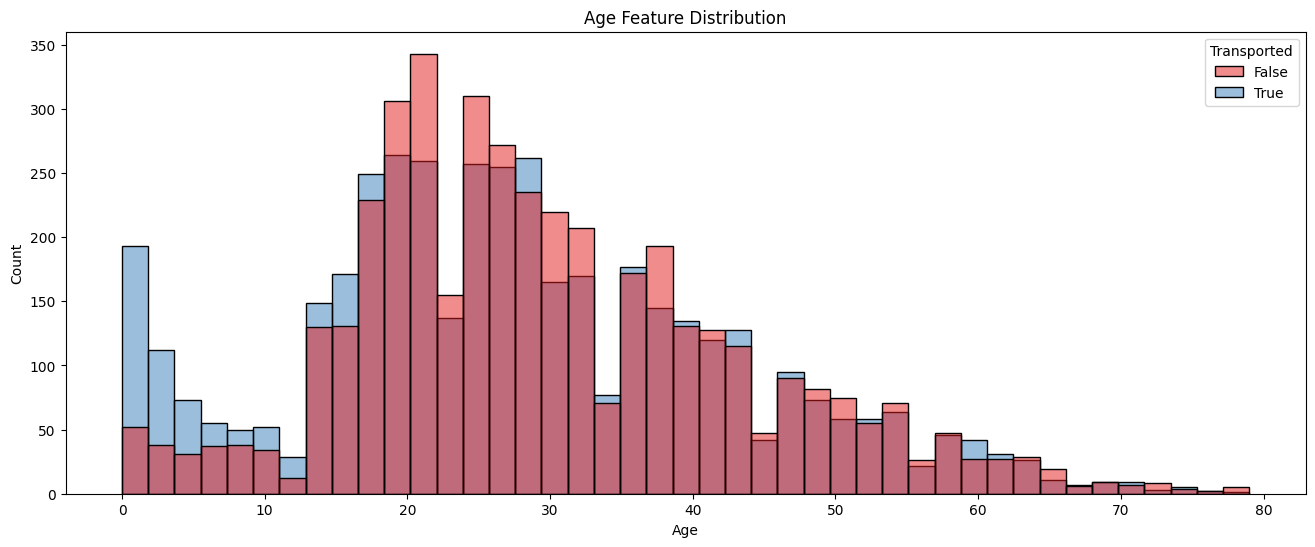

In [21]:
#5 Visualizing: age
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,palette="Set1")
plt.title("Age Feature Distribution");

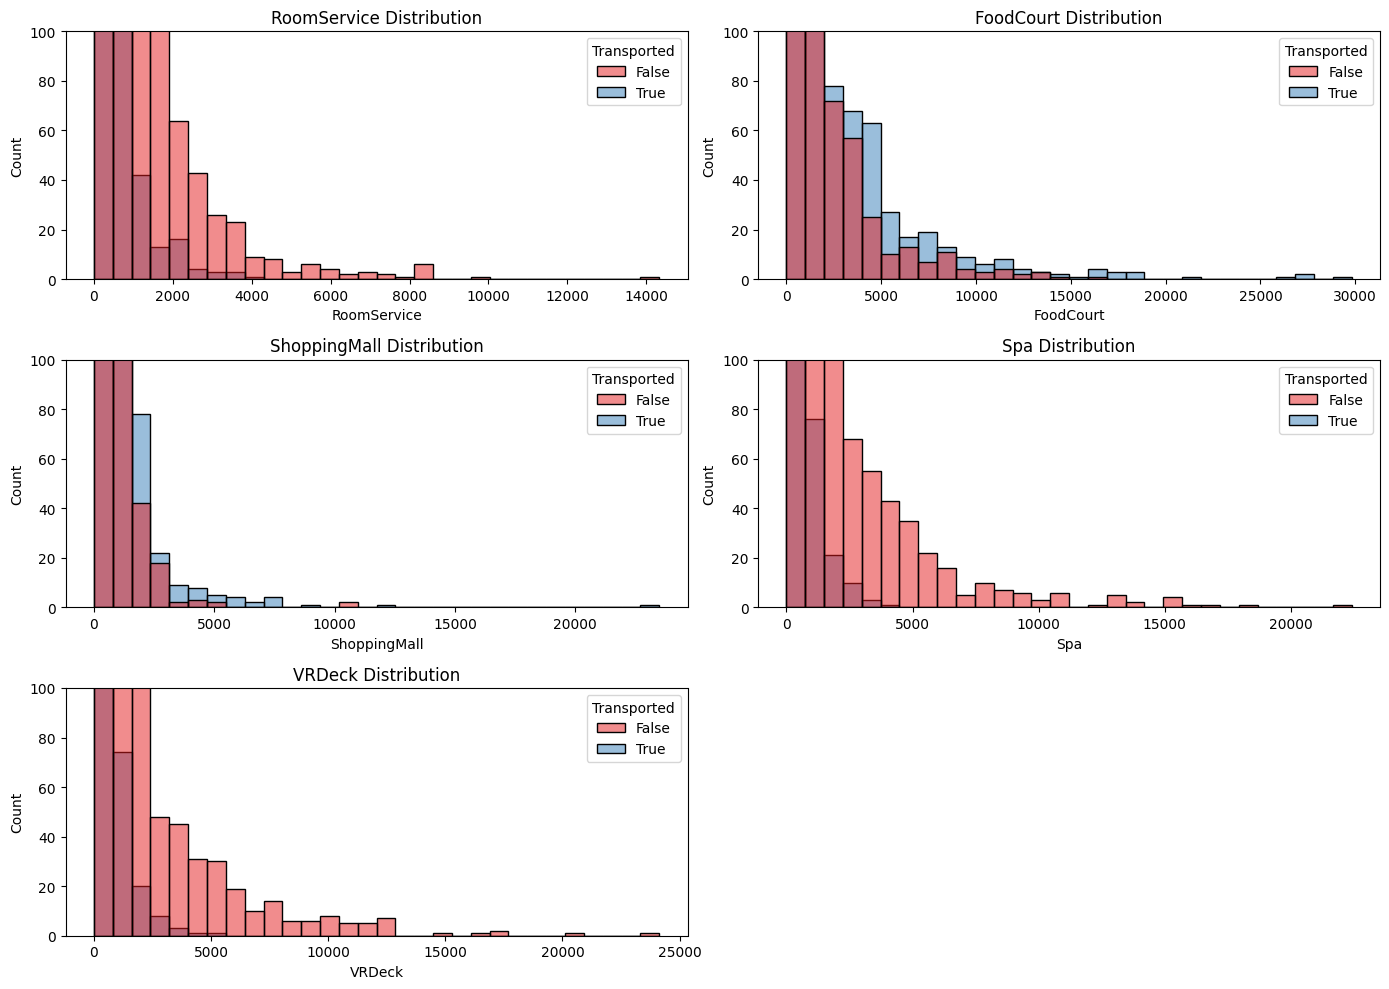

In [28]:
#6 Visualizing: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,palette="Set1")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

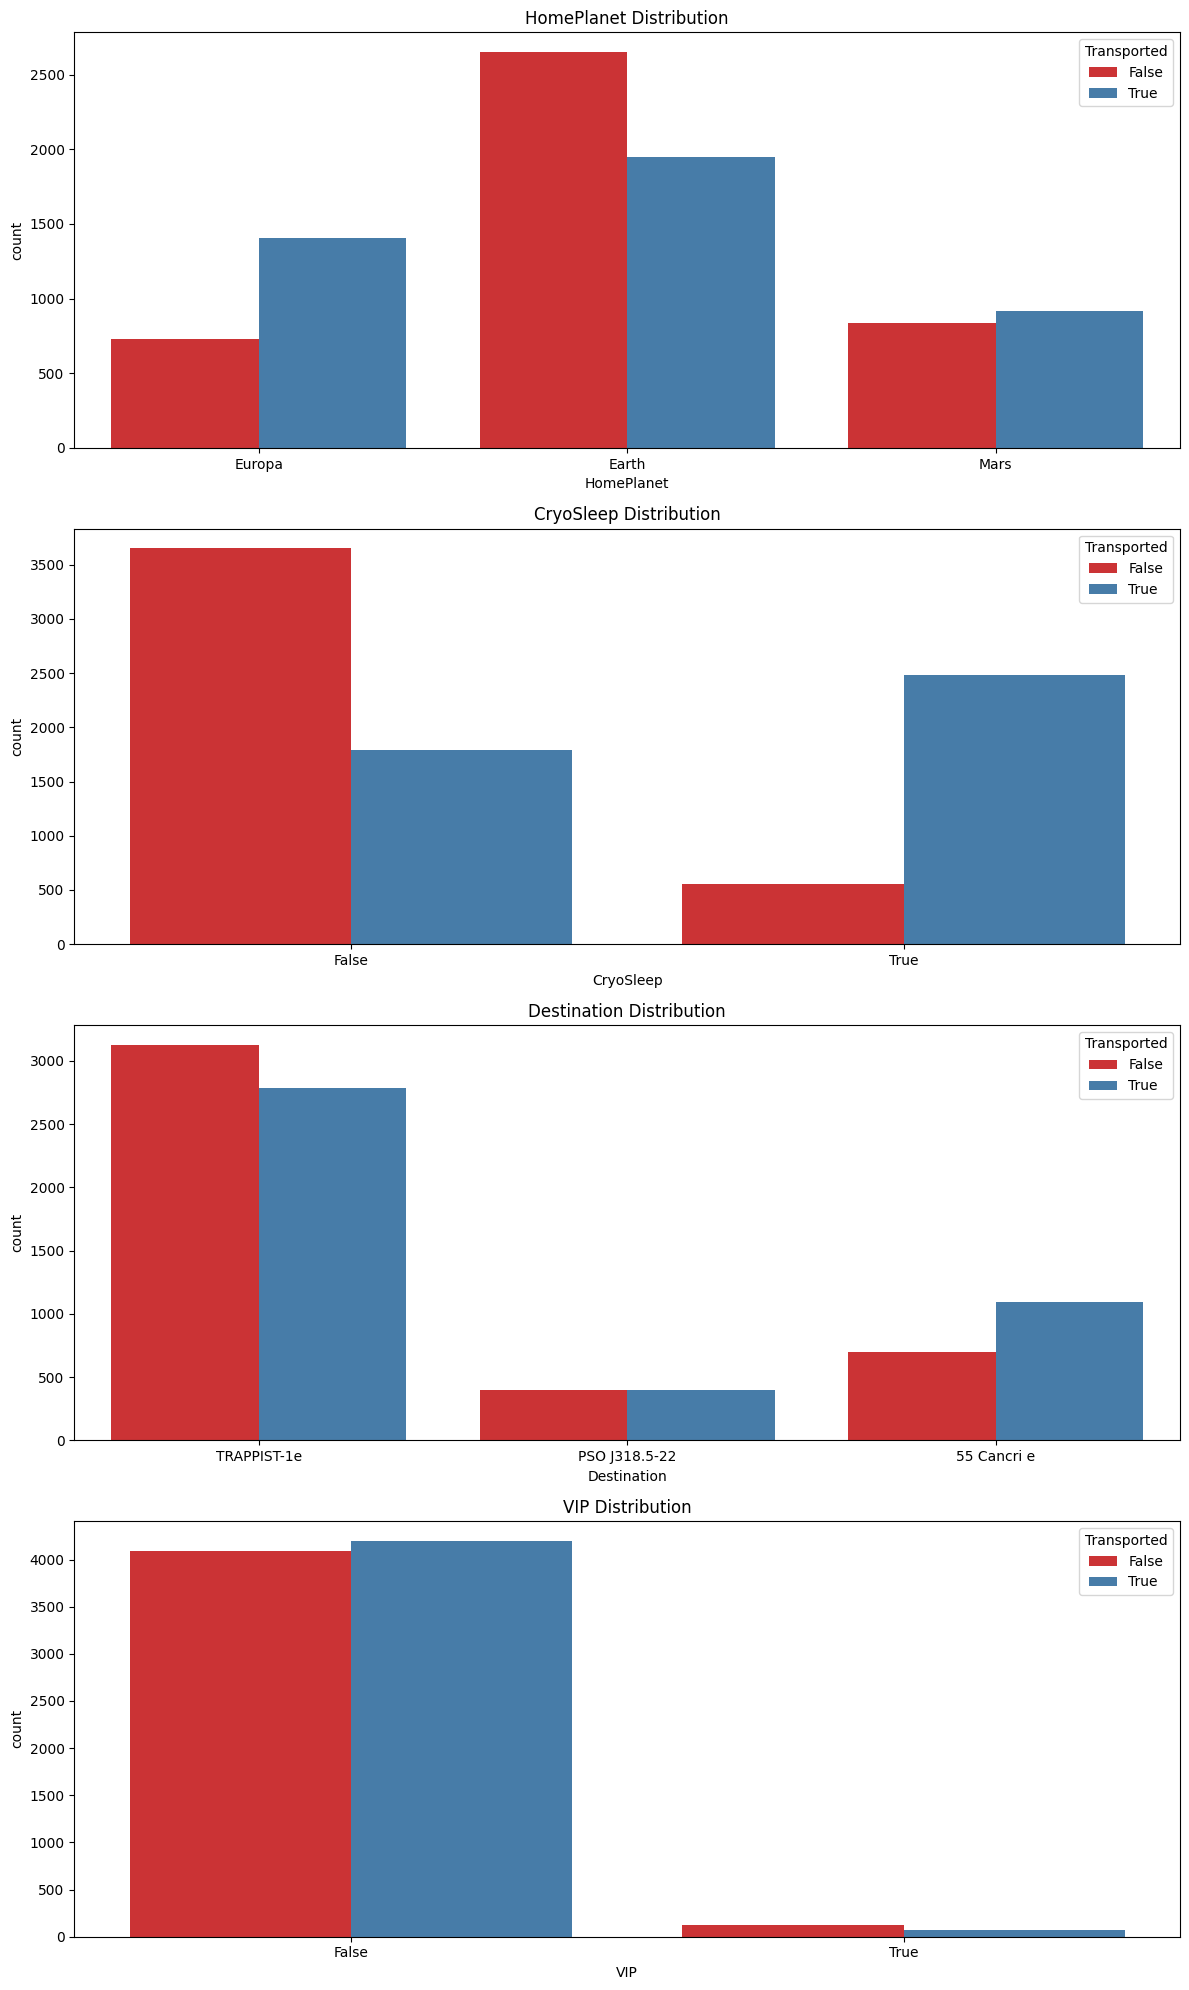

In [23]:
#7 Visualizing(categrical): RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set1")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [11]:
#II Feature Extraction

In [12]:
#1 PassengerId--> Group_Size, Travelling_Solo
def passengerid_new_features(df):
    
    #Splitting "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    
    #Grouping the "Group" feature wrt "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()
    
    #set of group values with more than 1 members.
    y = set(x[x>1].index)
    
    # New feature "Solo" , indicates whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)
    
    # New feature "Group_size" which will indicate each group's number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [13]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

In [14]:
# Dropping Group & Member feature
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

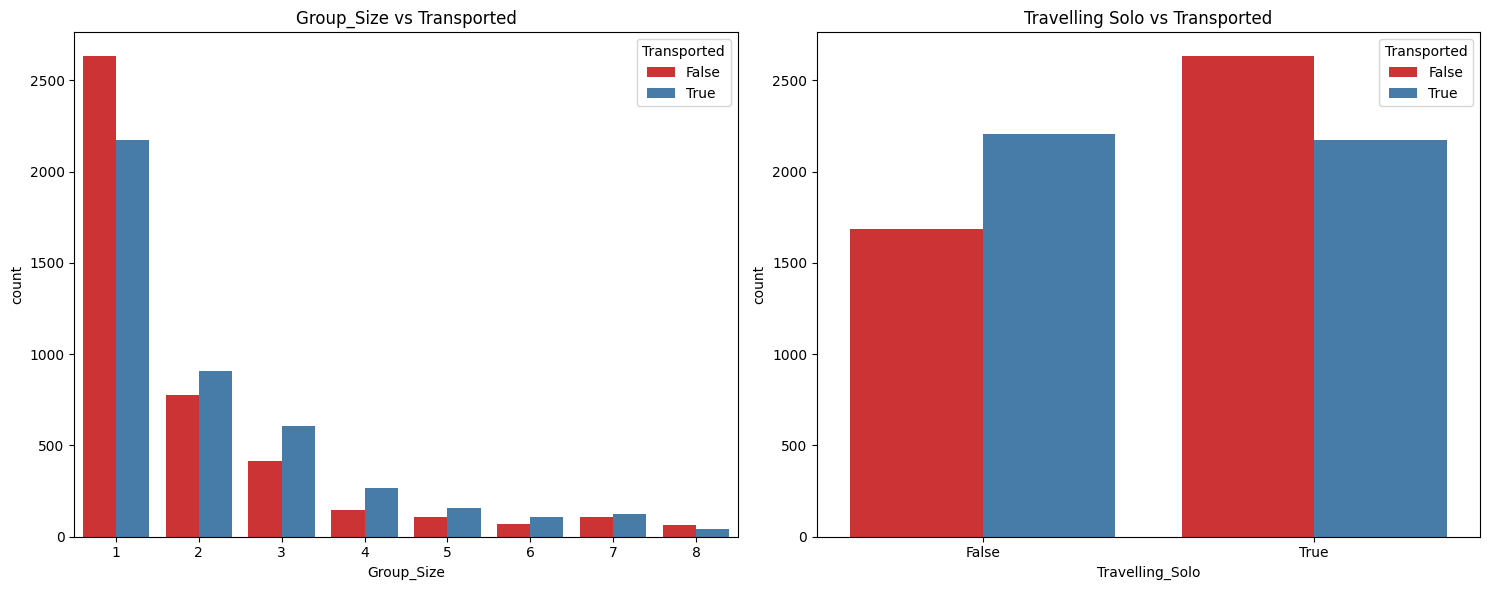

In [24]:
#Visualizing: Group_Size, Travelling_Solo 
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df,palette="Set1")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df,palette="Set1")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

In [37]:
#2 Cabin-->Cabin_Deck, Cabin_Number, Cabin_Side 
def cabin_new_feature(df):
    # Ensure all values in Cabin are strings
    df["Cabin"] = df["Cabin"].fillna("np.nan/np.nan/np.nan").astype(str)
    
    #Handling NaN values while splitting
    df["Cabin"].fillna("np.nan/np.nan/np.nan")  
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    #Replacing string nan values to numpy nan values.
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)

    # Convert Cabin_Number to numeric
    df["Cabin_Number"] = pd.to_numeric(df["Cabin_Number"], errors="coerce")
    
    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0])
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0])
    df["Cabin_Number"].fillna(df["Cabin_Number"].median())

In [38]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

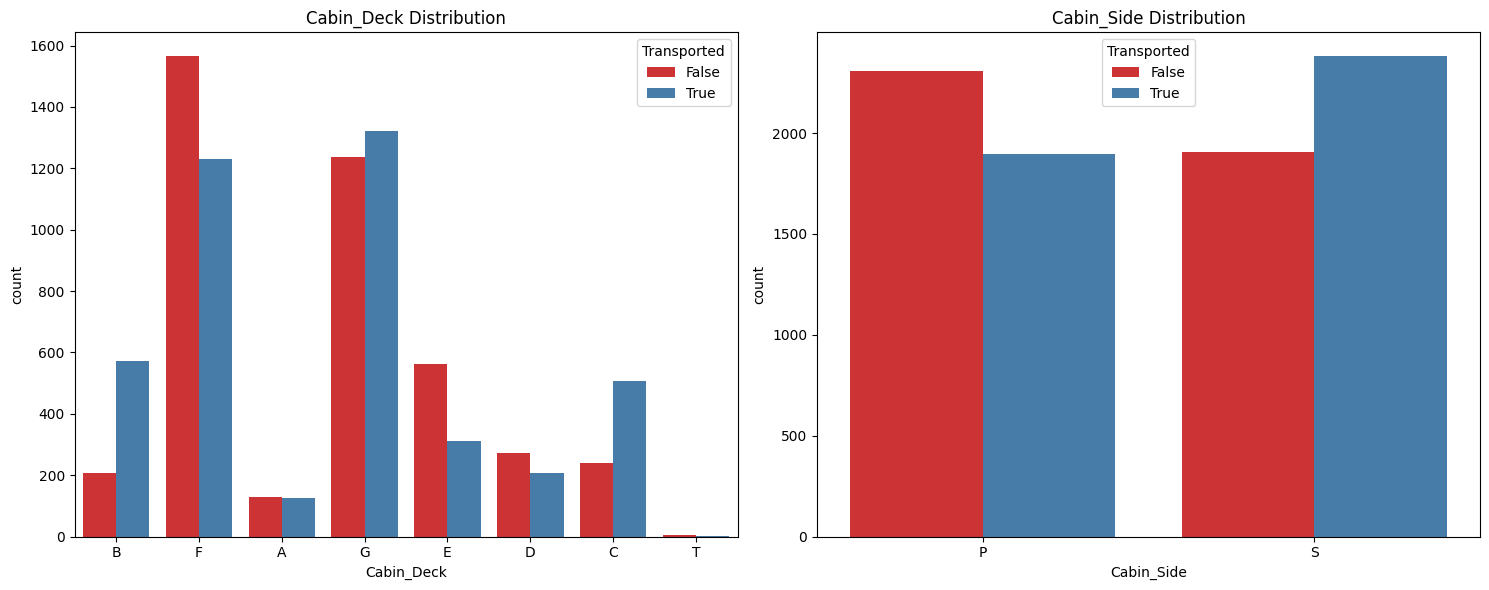

In [41]:
#Visualizing: Cabin_Deck, Cabin_Side
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_df, palette="Set1")
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set1")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()